In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import scipy.integrate as integrate

from numpy.linalg import norm
from gla_package.gla import siler_model_vectorized, classic_gla_model_vectorized, heligman_model_vectorized
import os
from numpy.linalg import norm
from scipy.optimize import minimize, least_squares
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
parameters_csv = "../parameters/human_parameters/population/life_table_both_GLA.csv"
# parameters = pd.read_csv(parameters_csv)
# parameters = parameters.sort_values(by=["RMSE"], ascending=True)[parameters["k_learning"] < 45]
# # parameters = parameters[parameters["Year"] < 1990]
# # parameters = parameters[parameters["Year"] > 1950]
# parameters = parameters.iloc[1]

# # print(parameters.iloc[0])
# print(parameters)

# heligman_parameters_csv = "../parameters/human_parameters/cohort/converted_death_rates_heligman.csv"
# heligman_parameters = pd.read_csv(heligman_parameters_csv)
# heligman_parameters = heligman_parameters.sort_values(by=["RMSE"], ascending=True)
# heligman_parameters = heligman_parameters.iloc[20]

# print(heligman_parameters)

# gla_parameters = pd.read_csv(parameters_csv)
# gla_parameters = gla_parameters[gla_parameters["Year"] == heligman_parameters["Year"]]
# gla_parameters = gla_parameters[gla_parameters["Country"] == heligman_parameters["Country"]].iloc[0]

# print(gla_parameters)

# heligman_parameters_csv = "../parameters/animals_and_plants/animals_and_plants_heligman.csv"
# gla_parameters_csv = "../parameters/animals_and_plants/animals_and_plants_GLA.csv"
# siler_parameters_csv = "../parameters/animals_and_plants/animals_and_plants_siler.csv"

# gla_parameters = pd.read_csv(gla_parameters_csv)
# gla_parameters = gla_parameters.sort_values(by=["RMSE"], ascending=True)
# gla_parameters = gla_parameters.iloc[9]

# heligman_parameters = pd.read_csv(heligman_parameters_csv)
# heligman_parameters = heligman_parameters[heligman_parameters["Species"] == gla_parameters["Species"]].iloc[0]

# siler_parameters = pd.read_csv(siler_parameters_csv)
# siler_parameters = siler_parameters[siler_parameters["Species"] == gla_parameters["Species"]].iloc[0]



# print(gla_parameters)
# print(siler_parameters)


a                 0.00276
b                0.043262
c                0.025202
Lmax             0.016068
k_learning      39.006865
n                0.110607
Gmax             0.051681
growth_rate      0.087652
Year                 1953
R2               0.998509
RMSE              0.00046
AIC           -303.833117
Country            GBR_NP
Name: 1036, dtype: object


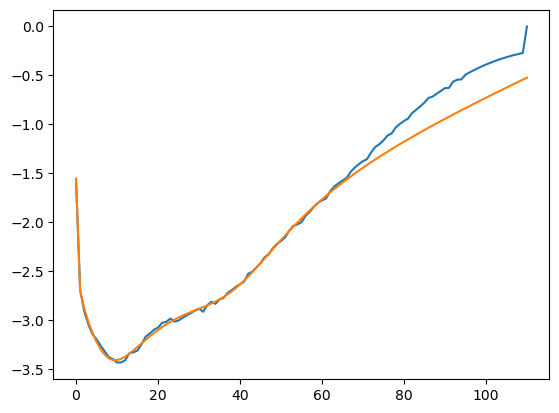

In [5]:
parameters_csv = "../parameters/human_parameters/population/65yo/life_table_both_GLA.csv"
life_table_dir = "../mortality_data/human_mortality_data/population/life_table_both/"

parameters = pd.read_csv(parameters_csv)
parameters = parameters[parameters["Year"] >= 1948]
parameters = parameters.sort_values(by=["AIC"], ascending=False)

parameters = parameters.iloc[-2]
print(parameters)

data = pd.read_csv(life_table_dir + parameters["Country"] + ".csv")
life_table = data[data['Year'] == parameters["Year"]]

plt.plot(life_table["Age"], np.log10(life_table["qx"]), label="Data")
plt.plot(life_table["Age"], np.log10(classic_gla_model_vectorized(life_table["Age"].to_numpy().astype(float), *parameters[["a", "b", "c", "Lmax", "k_learning", "n", "Gmax", "growth_rate"]])), label="Model")

In [ ]:
life_table = pd.read_csv(f"../mortality_data/animals_and_plants/data/{heligman_parameters['Species']}.csv")

print(*gla_parameters[["a", "b", "c", "Lmax", "k_learning", "n", "Gmax", "growth_rate"]])
plt.plot(life_table["Age"], np.log10(life_table["qx"]), label="Data")
plt.plot(life_table["Age"], np.log10(classic_gla_model_vectorized(life_table["Age"].to_numpy().astype(float), *gla_parameters[["a", "b", "c", "Lmax", "k_learning", "n", "Gmax", "growth_rate"]])), label="Model")
# plt.plot(life_table["Age"], np.log10(classic_gla_model_vectorized(life_table["Age"].to_numpy().astype(float), *params)), label="Model")
plt.legend()
plt.show()

# plt.plot(life_table["Age"], np.log10(life_table["qx"]), label="Data")
# plt.plot(life_table["Age"], np.log10(heligman_model_vectorized(life_table["Age"].to_numpy().astype(float), *heligman_parameters[["A", "B", "C", "D", "E", "F", "G", "H"]])), label="Model")
# plt.legend()
# plt.show()

plt.plot(life_table["Age"], np.log10(life_table["qx"]), label="Data")
plt.plot(life_table["Age"], np.log10(siler_model_vectorized(life_table["Age"].to_numpy().astype(float), *siler_parameters[["a1", "a2", "a3", "b1", "b3"]])), label="Model")
plt.legend()
plt.show()

NameError: name 'heligman_parameters' is not defined

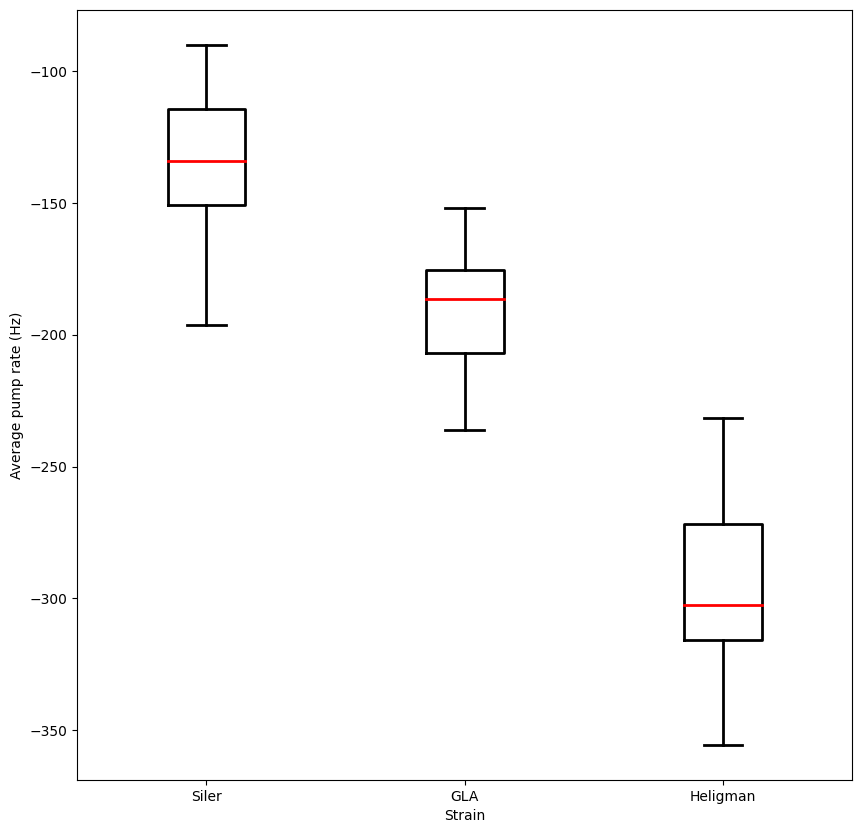

In [ ]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

silet_fits = "../parameters/human_parameters/cohort/converted_death_rates_siler.csv"
gla_fits = "../parameters/human_parameters/cohort/converted_death_rates_GLA.csv"
heligman_fits = "../parameters/human_parameters/cohort/converted_death_rates_heligman.csv"

siler_fits = pd.read_csv(silet_fits)
gla_fits = pd.read_csv(gla_fits)
heligman_fits = pd.read_csv(heligman_fits)

siler_fits = siler_fits[siler_fits["Year"] >= 1948]
gla_fits = gla_fits[gla_fits["Year"] >= 1948]
heligman_fits = heligman_fits[heligman_fits["Year"] >= 1948]

siler_fits = siler_fits[siler_fits["Year"] <= 1953]
gla_fits = gla_fits[gla_fits["Year"] <= 1953]
heligman_fits = heligman_fits[heligman_fits["Year"] <= 1953]

aic_siler = siler_fits["AIC"].to_numpy()
aic_gla = gla_fits["AIC"].to_numpy()
aic_heligman = heligman_fits["AIC"].to_numpy()

# Set width of bars
bar_width = 0.35

# Create box plots for the three groups
boxplot_data = [aic_siler, aic_gla, aic_heligman]

# Customizing box plot appearance
boxprops = dict(linewidth=2, color='black')
medianprops = dict(linewidth=2, color='red')
whiskerprops = dict(linewidth=2, color='black')
capprops = dict(linewidth=2, color='black')

labels = ['Siler', 'GLA', 'Heligman']
plt.boxplot(boxplot_data, labels=labels, showfliers=False, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops)
# Add scatter plot with high transparency
scatter_alpha = 0.3
x_shift_range = 0.1
# wt_x_shifts = np.random.uniform(low=-x_shift_range, high=x_shift_range, size=len(mean_for_each_wt))
# myo2Tir_x_shifts = np.random.uniform(low=-x_shift_range, high=x_shift_range, size=len(mean_for_each_myo2Tir))
# plt.scatter(np.full_like(mean_for_each_wt, 1) + wt_x_shifts, mean_for_each_wt, alpha=scatter_alpha, color='red')
# plt.scatter(np.full_like(mean_for_each_myo2Tir, 2) + myo2Tir_x_shifts, mean_for_each_myo2Tir, alpha=scatter_alpha, color='blue')


# Add labels, title, and legend
plt.xlabel('Strain')
plt.ylabel('Average pump rate (Hz)')

# Show the plot
plt.show()

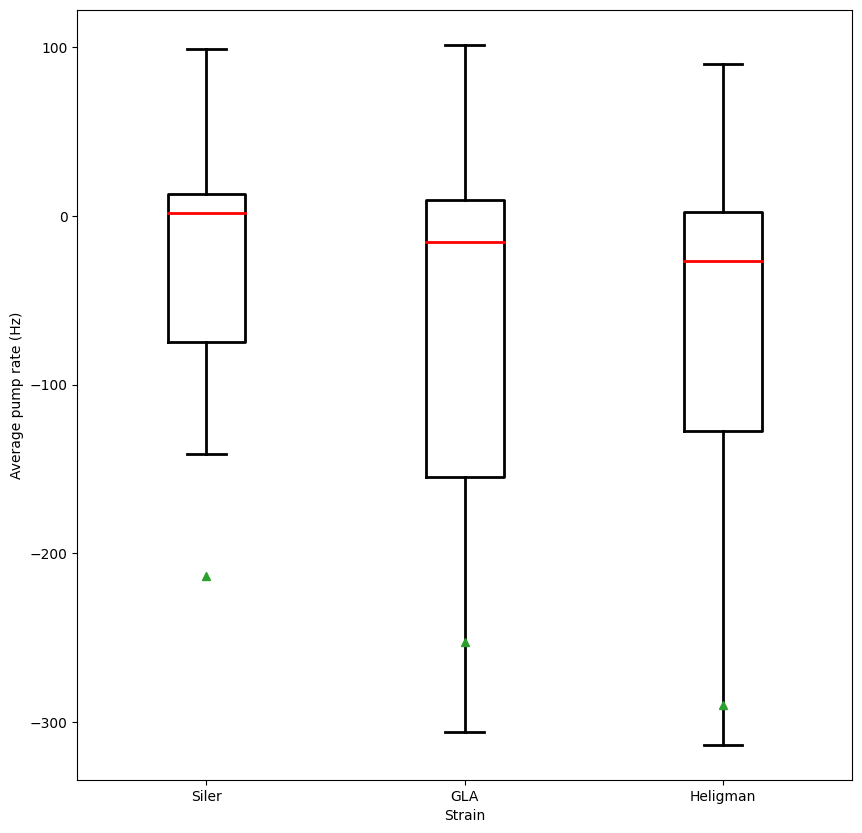

In [ ]:
matplotlib.rcParams['figure.figsize'] = [10, 10]

silet_fits = "../parameters/animals_and_plants/animals_and_plants_siler.csv"
gla_fits = "../parameters/animals_and_plants/animals_and_plants_GLA.csv"
heligman_fits = "../parameters/animals_and_plants/animals_and_plants_heligman.csv"

siler_fits = pd.read_csv(silet_fits)
gla_fits = pd.read_csv(gla_fits)
heligman_fits = pd.read_csv(heligman_fits)

aic_siler = siler_fits["AIC"].to_numpy()
aic_gla = gla_fits["AIC"].to_numpy()
aic_heligman = heligman_fits["AIC"].to_numpy()

# Set width of bars
bar_width = 0.35

# Create box plots for the three groups
boxplot_data = [aic_siler, aic_gla, aic_heligman]

# Customizing box plot appearance
boxprops = dict(linewidth=2, color='black')
medianprops = dict(linewidth=2, color='red')
whiskerprops = dict(linewidth=2, color='black')
capprops = dict(linewidth=2, color='black')

labels = ['Siler', 'GLA', 'Heligman']
plt.boxplot(boxplot_data, labels=labels, showfliers=False, boxprops=boxprops, medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, showmeans=True)
# Add scatter plot with high transparency
scatter_alpha = 0.3
x_shift_range = 0.1
# wt_x_shifts = np.random.uniform(low=-x_shift_range, high=x_shift_range, size=len(mean_for_each_wt))
# myo2Tir_x_shifts = np.random.uniform(low=-x_shift_range, high=x_shift_range, size=len(mean_for_each_myo2Tir))
# plt.scatter(np.full_like(mean_for_each_wt, 1) + wt_x_shifts, mean_for_each_wt, alpha=scatter_alpha, color='red')
# plt.scatter(np.full_like(mean_for_each_myo2Tir, 2) + myo2Tir_x_shifts, mean_for_each_myo2Tir, alpha=scatter_alpha, color='blue')


# Add labels, title, and legend
plt.xlabel('Strain')
plt.ylabel('Average pump rate (Hz)')

# Show the plot
plt.show()